In [1]:
import numpy as np
data1 = np.load('7.npz')
print(data1.files)
data2 = np.load('7_1.npz')
print(data2.files)
#data3 = np.load('7_2.npz')
#print(data3.files)
data4 = np.load('7_3ps.npz')
print(data4.files)
data5 = np.load('7_4ps.npz')
print(data5.files)
data6 = np.load('7_5ps.npz')
print(data6.files)
data7 = np.load('7_6ps.npz')
print(data7.files)
data8 = np.load('7_7ps.npz')
print(data8.files)
data9 = np.load('7_8ps.npz')
print(data8.files)
data10 = np.load('7_9ps.npz')
print(data8.files)

['Efavg_30000']
['Efavg_30000']
['Efavg_30000']
['Efavg_30000']
['Efavg_30000']
['Efavg_30000']
['Efavg_30000']
['Efavg_30000']
['Efavg_30000']


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy import signal
from time import sleep
import sys

#setup some constants and parameters
M=2**21 #模擬步數
tsim=7e-12 #模擬長度
eps0 = 8.854187e-12 
hbar = 1.05457182e-34
c = 2.99792458e8
kb = 1.380649e-23
hdk=7.63823258e-12 # hbar/kb
T=30000
deltap = np.sqrt(1/3/eps0/hbar/c)*kb*T #小delta
frequency = np.linspace(0, 25, 2*M)*10**15
omega = frequency*2*np.pi

def D(omega,T):
    return(hbar*omega/np.pi/c/(np.exp(hdk*omega/T)-1))

/tmp/ipykernel_13285/1414304295.py:22: RuntimeWarning: invalid value encountered in divide
  return(hbar*omega/np.pi/c/(np.exp(hdk*omega/T)-1))


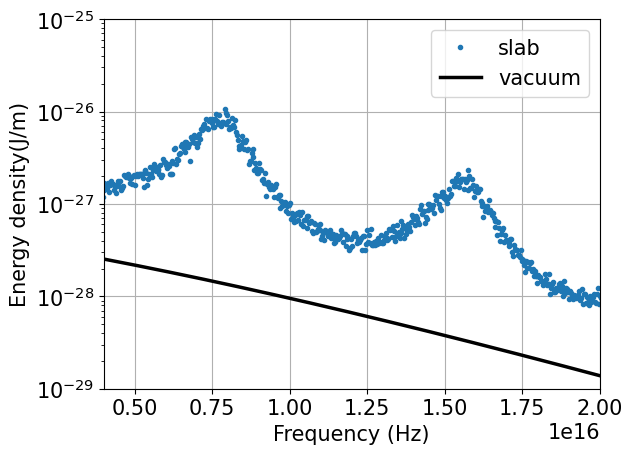

In [4]:
tsim=7e-12
eps0 = 8.854187e-12
import matplotlib.pyplot as plt
Efavg1 = data1['Efavg_30000']
Efavg2 = data2['Efavg_30000']
#Efavg3 = data3['Efavg_30000']
Efavg4 = data4['Efavg_30000']
Efavg5 = data5['Efavg_30000']
Efavg6 = data6['Efavg_30000']
Efavg7 = data7['Efavg_30000']
Efavg8 = data8['Efavg_30000']
Efavg9 = data9['Efavg_30000']
Efavg10 = data10['Efavg_30000']
Efavg = (Efavg1 +Efavg2 +Efavg4 +Efavg5 +Efavg6 +Efavg7 +Efavg8 +Efavg9 +Efavg10)/9
freqs = np.linspace(0,30e15,1000)
plt.rcParams.update({'font.size': 15})
plt.plot(freqs,Efavg*tsim*eps0*4*np.pi*3/2**21,'.',label='slab')
#plt.plot(freqs,Efavg2*tsim*2*eps0*4*np.pi*3/2**22,'.',label='14ps')
#plt.plot(freqs,Efavg3*tsim*4*eps0*4*np.pi*3/2**23,'.',label='28ps')
#plt.plot(freqs,Efavg4*tsim*8*eps0*4*np.pi*3/2**24,'.',label='56ps')
#plt.plot(freqs,Efavg5*tsim*16*eps0*4*np.pi*3/2**25,'.',label='112ps')
#plt.plot(freqs,Efavg6*tsim*32*eps0*4*np.pi*3/2**26,'.',label='224ps')
#plt.plot(freqs,Efavg7*tsim*64*eps0*4*np.pi*3/2**27,'.',label='448ps')
#plt.plot(freqs,Efavg8*tsim*128*eps0*4*np.pi*3/2**28,'.',label='896ps')
plt.plot(omega,D(abs(omega),T),'black', linewidth=2.5,label='vacuum')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Energy density(J/m)')
plt.yscale("log")
plt.xlim(4e15,20e15)
plt.ylim(0.1e-28,1e-25)
plt.legend()
plt.grid()
plt.savefig('7ps.png')
plt.show()



In [1]:
from PIL import Image

def transPNG(srcImageName, dstImageName):
    img = Image.open(srcImageName)
    img = img.convert("RGBA")
    datas = img.getdata()
    newData = list()
    for item in datas:
        if item[0] > 225 and item[1] > 225 and item[2] > 225:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
    img.putdata(newData)
    img.save(dstImageName, "PNG")
transPNG('30000_2.4um_photonic_crystal.png','new30000_2.4um_photonic_crystal.png')